### Loading Files

In [1]:
import numpy as np
import pandas as pd

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/bengaliai-cv19/test_image_data_0.parquet
/kaggle/input/bengaliai-cv19/sample_submission.csv
/kaggle/input/bengaliai-cv19/test_image_data_3.parquet
/kaggle/input/bengaliai-cv19/train_image_data_0.parquet
/kaggle/input/bengaliai-cv19/test_image_data_1.parquet
/kaggle/input/bengaliai-cv19/train_image_data_2.parquet
/kaggle/input/bengaliai-cv19/train_image_data_3.parquet
/kaggle/input/bengaliai-cv19/test_image_data_2.parquet
/kaggle/input/bengaliai-cv19/train_image_data_1.parquet
/kaggle/input/bengaliai-cv19/class_map.csv
/kaggle/input/bengaliai-cv19/test.csv
/kaggle/input/bengaliai-cv19/train.csv


In [2]:
def change_size(df):
    preprocessed = {}
    for i in range(df.shape[0]):
        image = cv2.resize(df.loc[df.index[i]].values.reshape(137,236),(64,64))
        image = image.reshape(-1)
        preprocessed[df.index[i]] = image
        
    preprocessed = pd.DataFrame(preprocessed).T
    return preprocessed

### Model:

In [3]:
import tensorflow
from tensorflow.keras import layers
from tensorflow.keras import Model
from tensorflow.keras.layers import Dense, Activation, Conv2D, Flatten, Concatenate, GlobalAveragePooling2D, MaxPooling2D, AveragePooling2D, MaxPool2D, Dropout, BatchNormalization, Input, LeakyReLU
from tensorflow.keras import regularizers

inputs = Input(shape = (64, 64, 1))

VGG_adjusted = Conv2D(filters=32, kernel_size=(3, 3), padding='same')(inputs)
VGG_adjusted = LeakyReLU()(VGG_adjusted)
VGG_adjusted = Conv2D(filters=32, kernel_size=(3, 3), padding='same')(VGG_adjusted)
VGG_adjusted = LeakyReLU()(VGG_adjusted)
VGG_adjusted = Conv2D(filters=32, kernel_size=(3, 3), padding='same')(VGG_adjusted)
VGG_adjusted = LeakyReLU()(VGG_adjusted)

VGG_adjusted = BatchNormalization()(VGG_adjusted)
VGG_adjusted = MaxPool2D((2, 2))(VGG_adjusted)
VGG_adjusted = Conv2D(filters=32, kernel_size=(5, 5), padding='same')(VGG_adjusted)
VGG_adjusted = LeakyReLU()(VGG_adjusted)
VGG_adjusted = BatchNormalization()(VGG_adjusted)
VGG_adjusted = Dropout(0.2)(VGG_adjusted)

VGG_adjusted = Conv2D(filters=64, kernel_size=(3, 3), padding='same', activation='relu')(VGG_adjusted)
VGG_adjusted = Conv2D(filters=64, kernel_size=(3, 3), padding='same', activation='relu')(VGG_adjusted)
VGG_adjusted = Conv2D(filters=64, kernel_size=(3, 3), padding='same', activation='relu')(VGG_adjusted)

VGG_adjusted = BatchNormalization()(VGG_adjusted)
VGG_adjusted = MaxPool2D((2, 2))(VGG_adjusted)
VGG_adjusted = Conv2D(filters=64, kernel_size=(5, 5), padding='same', activation='relu')(VGG_adjusted)
VGG_adjusted = BatchNormalization()(VGG_adjusted)
VGG_adjusted = Dropout(0.2)(VGG_adjusted)

VGG_adjusted = Conv2D(filters=128, kernel_size=(3, 3), padding='same', activation='relu')(VGG_adjusted)
VGG_adjusted = Conv2D(filters=128, kernel_size=(3, 3), padding='same', activation='relu')(VGG_adjusted)
VGG_adjusted = Conv2D(filters=128, kernel_size=(3, 3), padding='same', activation='relu')(VGG_adjusted)

VGG_adjusted = BatchNormalization()(VGG_adjusted)
VGG_adjusted = MaxPool2D((2, 2))(VGG_adjusted)
VGG_adjusted = Conv2D(filters=128, kernel_size=(5, 5), padding='same', activation='relu')(VGG_adjusted)
VGG_adjusted = BatchNormalization()(VGG_adjusted)
VGG_adjusted = Dropout(0.2)(VGG_adjusted)

VGG_adjusted = Conv2D(filters=256, kernel_size=(3, 3), padding='same', activation='relu')(VGG_adjusted)
VGG_adjusted = Conv2D(filters=256, kernel_size=(3, 3), padding='same', activation='relu')(VGG_adjusted)
VGG_adjusted = Conv2D(filters=256, kernel_size=(3, 3), padding='same', activation='relu')(VGG_adjusted)

VGG_adjusted = BatchNormalization()(VGG_adjusted)
VGG_adjusted = MaxPool2D((2, 2))(VGG_adjusted)
VGG_adjusted = Conv2D(filters=256, kernel_size=(5, 5), padding='same', activation='relu')(VGG_adjusted)
VGG_adjusted = BatchNormalization()(VGG_adjusted)
VGG_adjusted = Dropout(0.2)(VGG_adjusted)

VGG_adjusted = Conv2D(filters=512, kernel_size=(3, 3), padding='same', activation='relu')(VGG_adjusted)
VGG_adjusted = Conv2D(filters=512, kernel_size=(3, 3), padding='same', activation='relu')(VGG_adjusted)

VGG_adjusted = BatchNormalization()(VGG_adjusted)
VGG_adjusted = MaxPool2D((2, 2))(VGG_adjusted)
VGG_adjusted = Conv2D(filters=512, kernel_size=(5, 5), padding='same', activation='relu')(VGG_adjusted)
VGG_adjusted = BatchNormalization()(VGG_adjusted)
VGG_adjusted = Dropout(0.2)(VGG_adjusted)

#Classification Part
VGG_adjusted = Flatten()(VGG_adjusted)
VGG_adjusted = Dense(1024, activation = "relu")(VGG_adjusted)
VGG_adjusted = Dropout(0.30)(VGG_adjusted)
VGG_adjusted = Dense(512, activation = "relu")(VGG_adjusted)
VGG_adjusted = Dropout(0.10)(VGG_adjusted)

root = Dense(168, activation='softmax', kernel_regularizer=regularizers.l2(0.01), name='activation_1_root')(VGG_adjusted) 
vowel = Dense(11, activation='softmax', kernel_regularizer=regularizers.l2(0.01), name='activation_2_vowel')(VGG_adjusted) 
consonant = Dense(7, activation='softmax', kernel_regularizer=regularizers.l2(0.01), name='final_activation_consonant')(VGG_adjusted)

VGG_adjusted = Model(inputs=inputs, outputs=[root, vowel, consonant])

In [4]:
VGG_adjusted.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 64, 64, 1)]  0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 64, 64, 32)   320         input_1[0][0]                    
__________________________________________________________________________________________________
leaky_re_lu (LeakyReLU)         (None, 64, 64, 32)   0           conv2d[0][0]                     
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 64, 64, 32)   9248        leaky_re_lu[0][0]                
______________________________________________________________________________________________

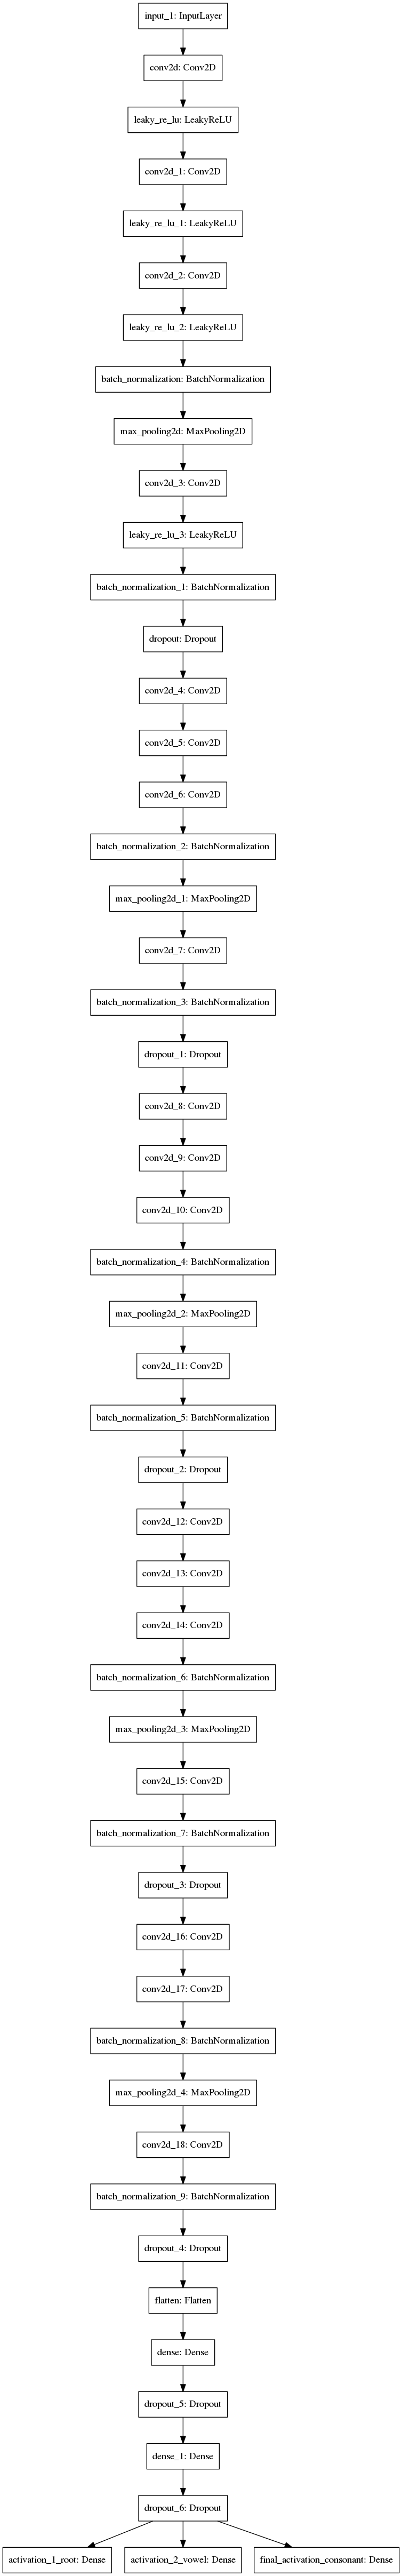

In [5]:
from tensorflow.keras.utils import plot_model

plot_model(VGG_adjusted)

In [6]:
from tensorflow.keras.optimizers import Adam

VGG_adjusted.compile(
        optimizer = Adam(lr= 1E-3, epsilon = 1e-8), 
        loss = "categorical_crossentropy", 
        metrics = ['accuracy']
        )

In [7]:
class DataGenerator(tensorflow.keras.preprocessing.image.ImageDataGenerator):
    
    def flow(self,x, y=None, batch_size=32, shuffle=True): 
        labels = None 
        keys = {} 
        ordered = []
        
        for key, value in y.items():
            labels = value if (labels is None) else (np.concatenate((labels, value), axis=1))
            keys[key] = value.shape[1] 
            ordered.append(key)

        for output_x, output_y in super().flow(x, labels, batch_size=32):
            label_dict = {}
            pos = 0
            
            for label in ordered:
                target_length = keys[label]
                label_dict[label] = output_y[:, pos: pos + target_length] 
                pos += target_length

            yield output_x, label_dict

In [8]:
from keras.callbacks import ReduceLROnPlateau, ModelCheckpoint, EarlyStopping 

reduce_learning_rate = ReduceLROnPlateau(monitor='val_loss', patience=2, verbose=1, factor=0.1, mode="min", min_lr = 0.00001)
checkpoint = ModelCheckpoint('best_model_vgg_try.h5', monitor ='val_loss', save_best_only = True, save_weights_only=True)

callbacks = [reduce_learning_rate, checkpoint]

Using TensorFlow backend.


### Training:

In [9]:
import gc
import tqdm
from sklearn.model_selection import train_test_split

In [10]:
train_df = pd.read_csv('../input/bengaliai-cv19/train.csv')

In [11]:
import cv2

In [12]:
histories = []
for i in range(4):
    print('Loading file:', i)
    df = pd.merge(pd.read_parquet(f'/kaggle/input/bengaliai-cv19/train_image_data_{i}.parquet'), train_df, on='image_id')

    grapheme = pd.get_dummies(df['grapheme_root']).values
    vowel = pd.get_dummies(df['vowel_diacritic']).values  
    consonant = pd.get_dummies(df['consonant_diacritic']).values

    df.drop(['image_id','grapheme_root','vowel_diacritic','consonant_diacritic','grapheme'], axis=1,inplace=True)
    df = change_size(df).astype('float32')

    df = df.values.reshape(-1, 64, 64, 1)
    df, test_x, train_graph_y, test_graph_y, train_vowel_y, test_vowel_y, train_cons_y, test_cons_y = train_test_split(df, grapheme,vowel,consonant, test_size=0.20)

    del grapheme
    del vowel
    del consonant
    gc.collect()

    gen = DataGenerator(rotation_range= 15, 
                        zoom_range = 0.10,
                        width_shift_range=0.10,
                        height_shift_range=0.10
                       )


    gen.fit(df)
    print('Training:')
    history = VGG_adjusted.fit_generator(gen.flow(df, {'activation_1_root': train_graph_y, 'activation_2_vowel': train_vowel_y, 'final_activation_consonant': train_cons_y}, batch_size= 32),
                                      epochs = 25,
                                      validation_data = (test_x, [test_graph_y, test_vowel_y, test_cons_y]),
                                      steps_per_epoch= df.shape[0] // 32,
                                      callbacks= callbacks,
                                      shuffle=True)
    histories.append(history)
    del history
    del df
    del test_vowel_y
    del train_cons_y
    del test_cons_y
    del gen
    del test_x
    del train_graph_y
    del test_graph_y
    del train_vowel_y
    gc.collect()

Loading file: 0
Training:
Train for 1255 steps, validate on 10042 samples
Epoch 1/25
1255/1255 [==============================] - 58s 46ms/step - loss: 7.6474 - activation_1_root_loss: 4.6728 - activation_2_vowel_loss: 1.3704 - final_activation_consonant_loss: 1.1807 - activation_1_root_accuracy: 0.0322 - activation_2_vowel_accuracy: 0.5193 - final_activation_consonant_accuracy: 0.6210 - val_loss: 9.1725 - val_activation_1_root_loss: 5.2127 - val_activation_2_vowel_loss: 2.2041 - val_final_activation_consonant_loss: 1.5930 - val_activation_1_root_accuracy: 0.0135 - val_activation_2_vowel_accuracy: 0.3691 - val_final_activation_consonant_accuracy: 0.6218
Epoch 2/25
1255/1255 [==============================] - 52s 41ms/step - loss: 6.2543 - activation_1_root_loss: 4.3470 - activation_2_vowel_loss: 0.7914 - final_activation_consonant_loss: 0.9645 - activation_1_root_accuracy: 0.0458 - activation_2_vowel_accuracy: 0.7388 - final_activation_consonant_accuracy: 0.6594 - val_loss: 9.2511 - va

In [13]:
import matplotlib.pyplot as plt

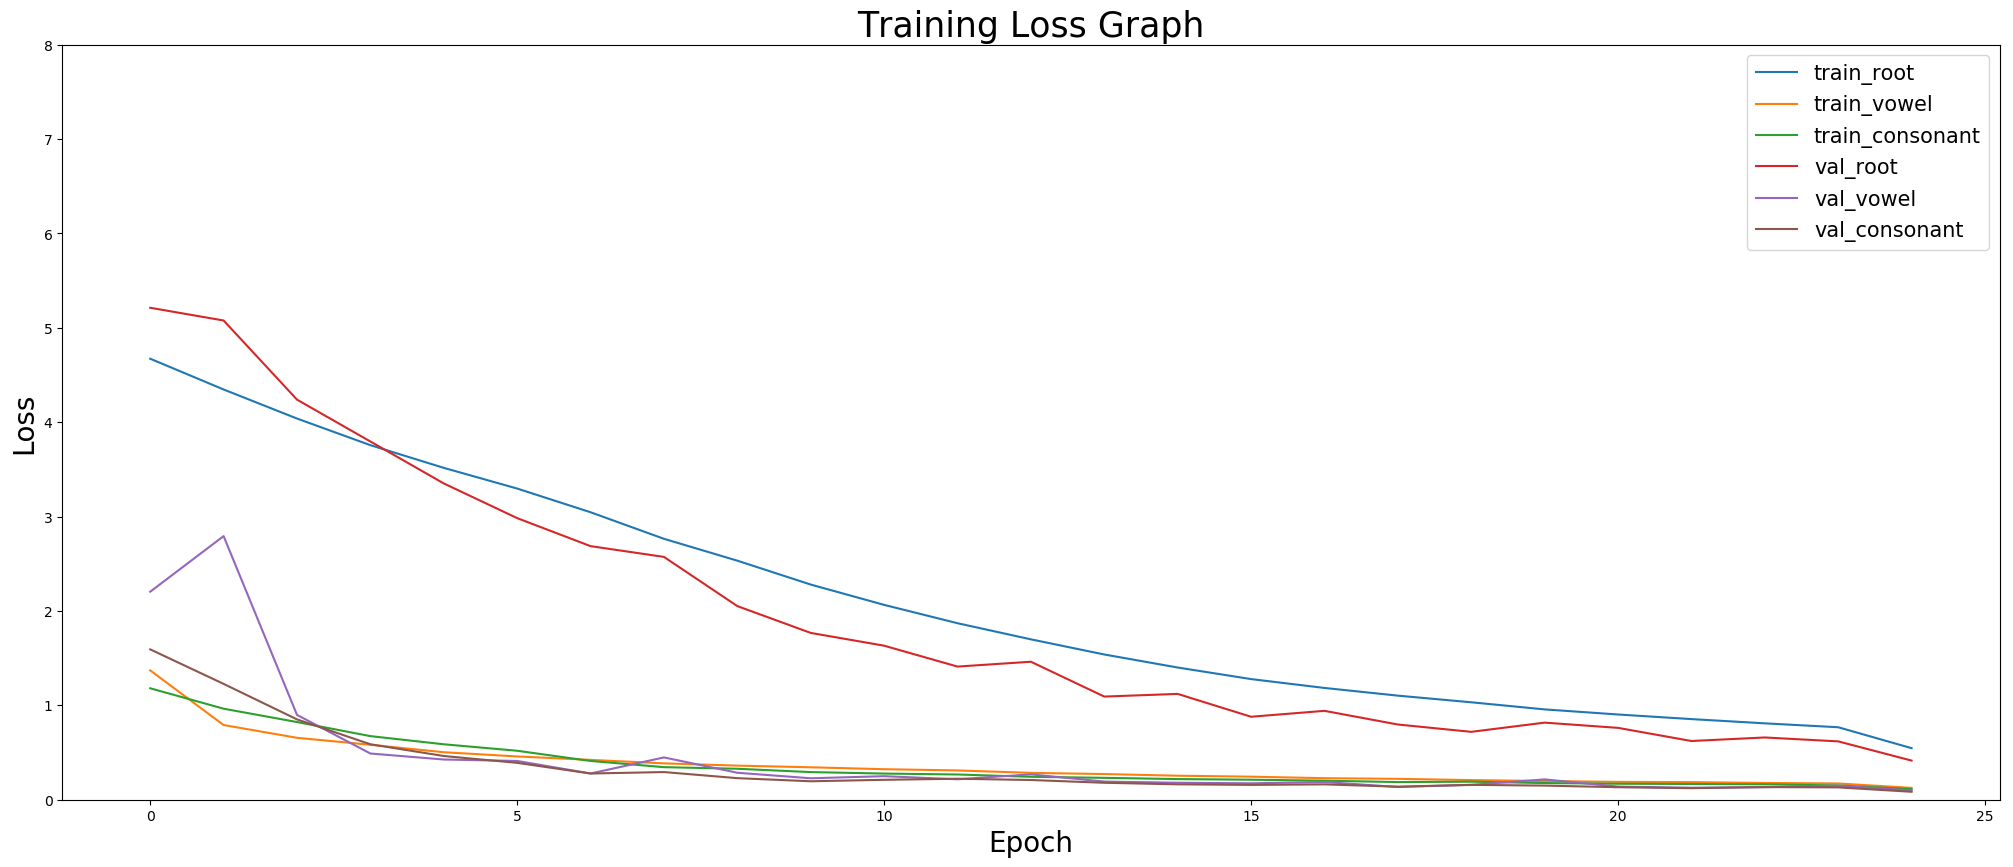

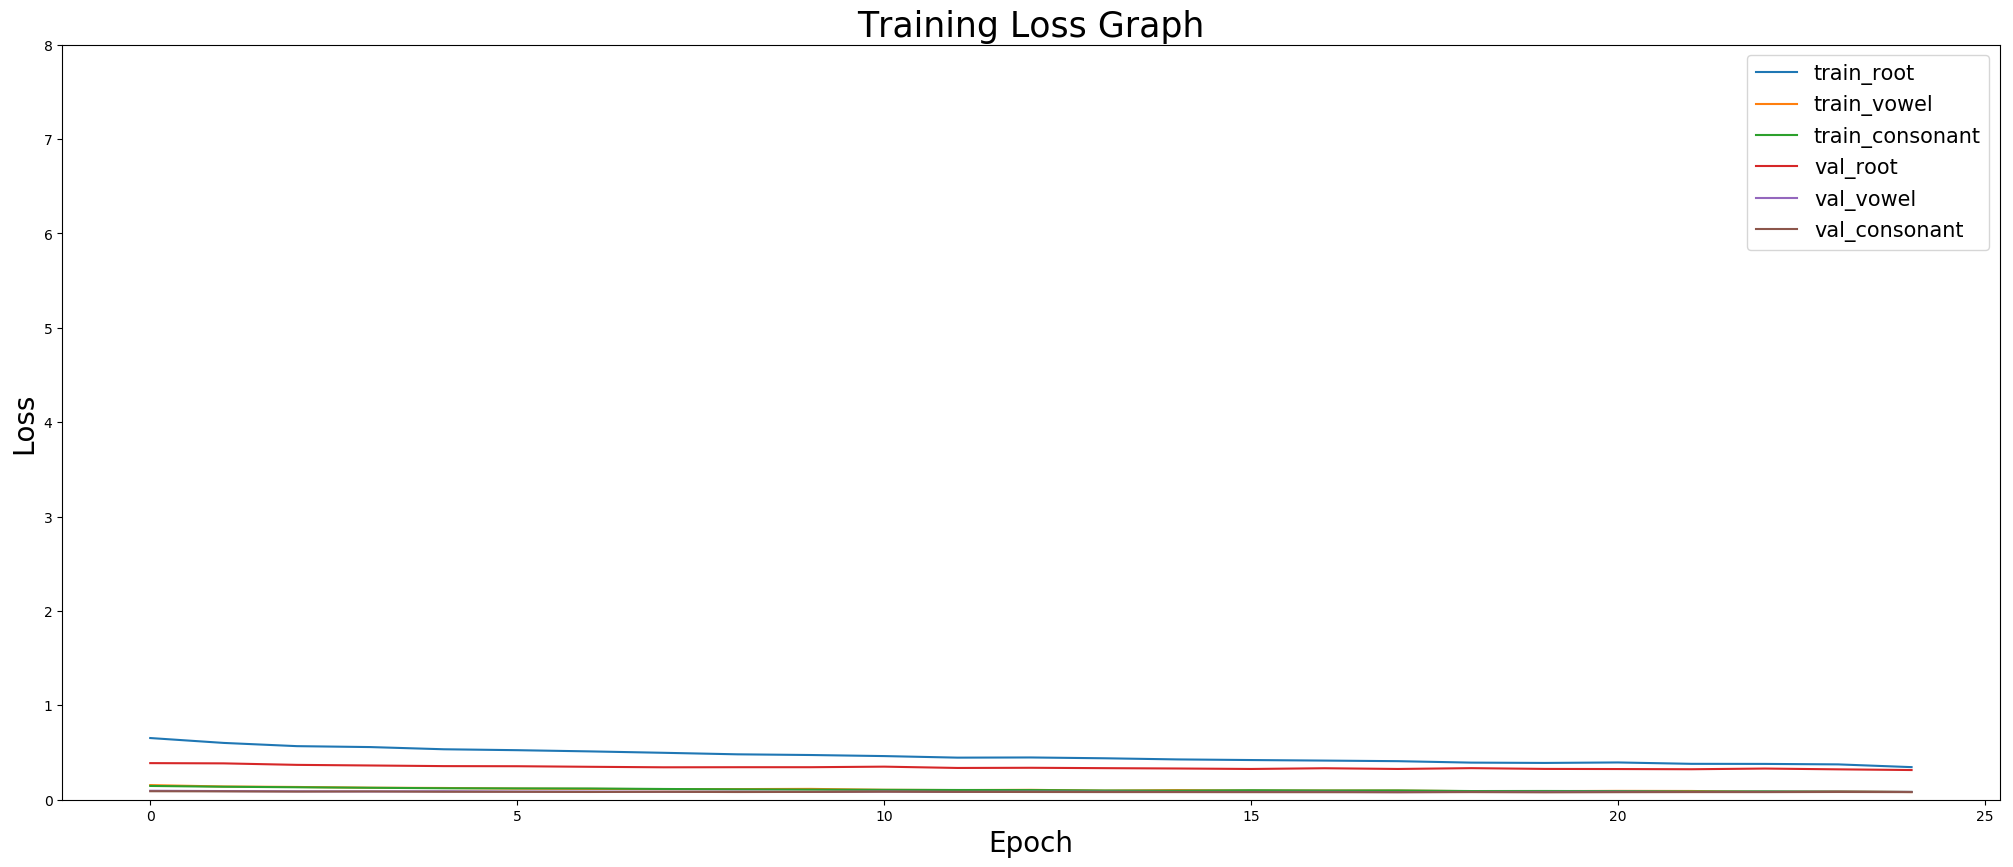

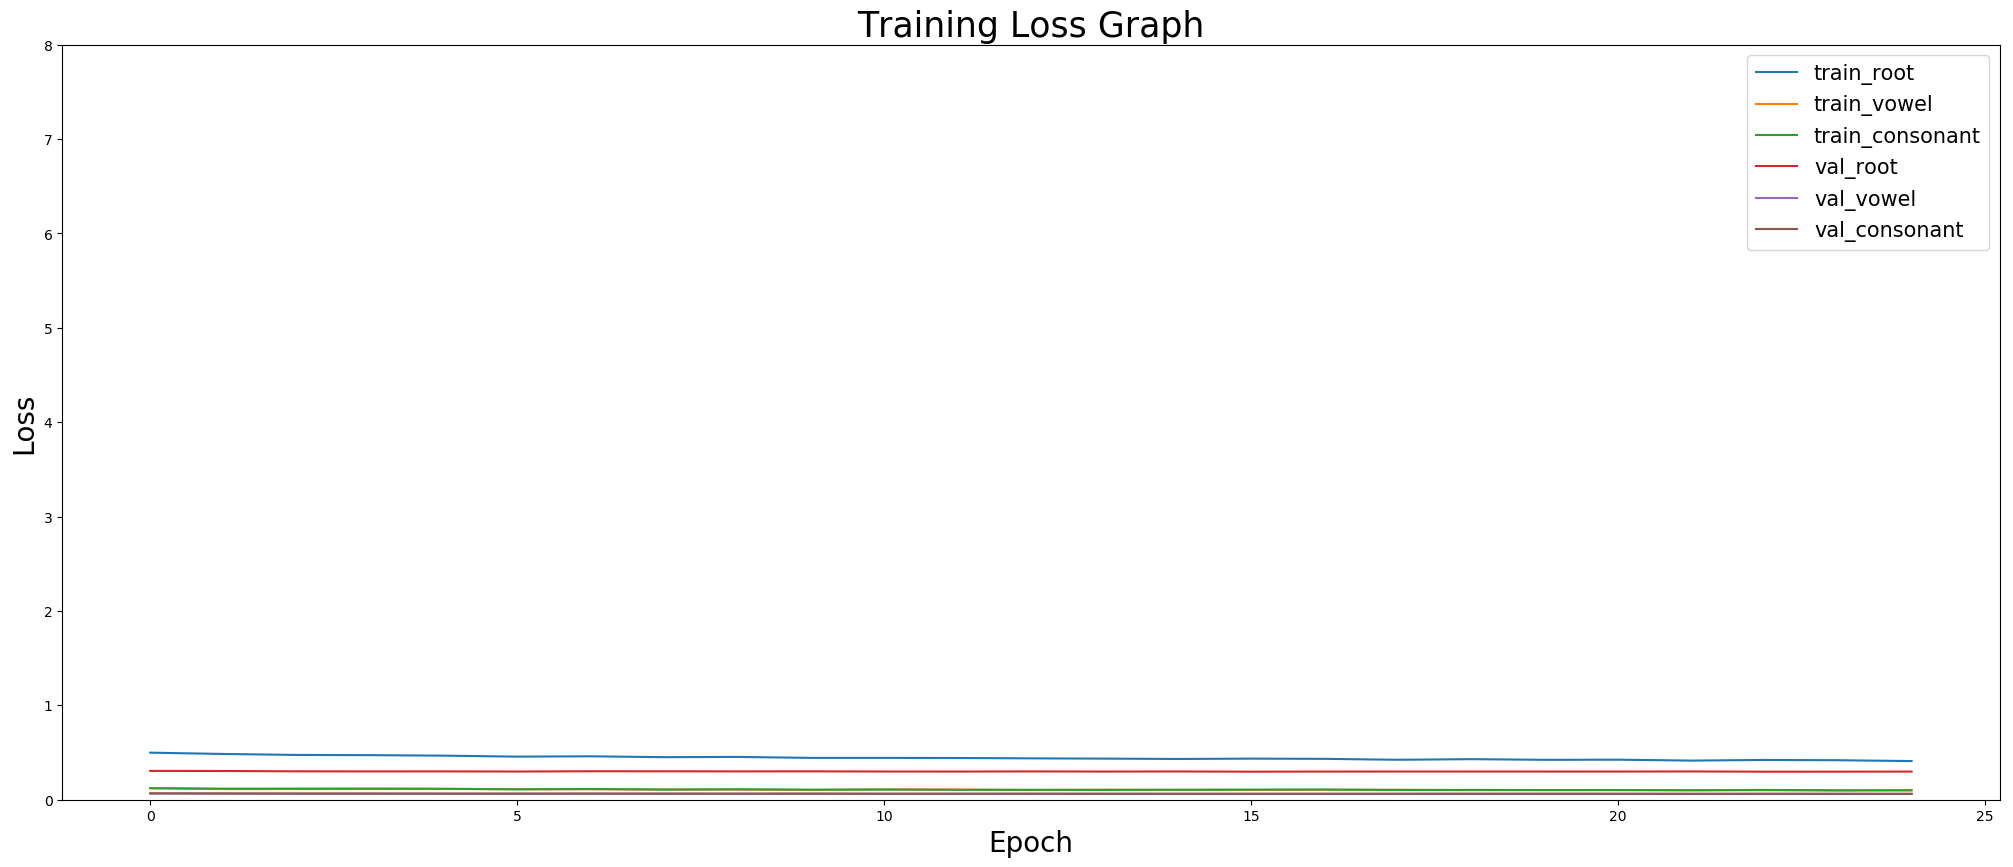

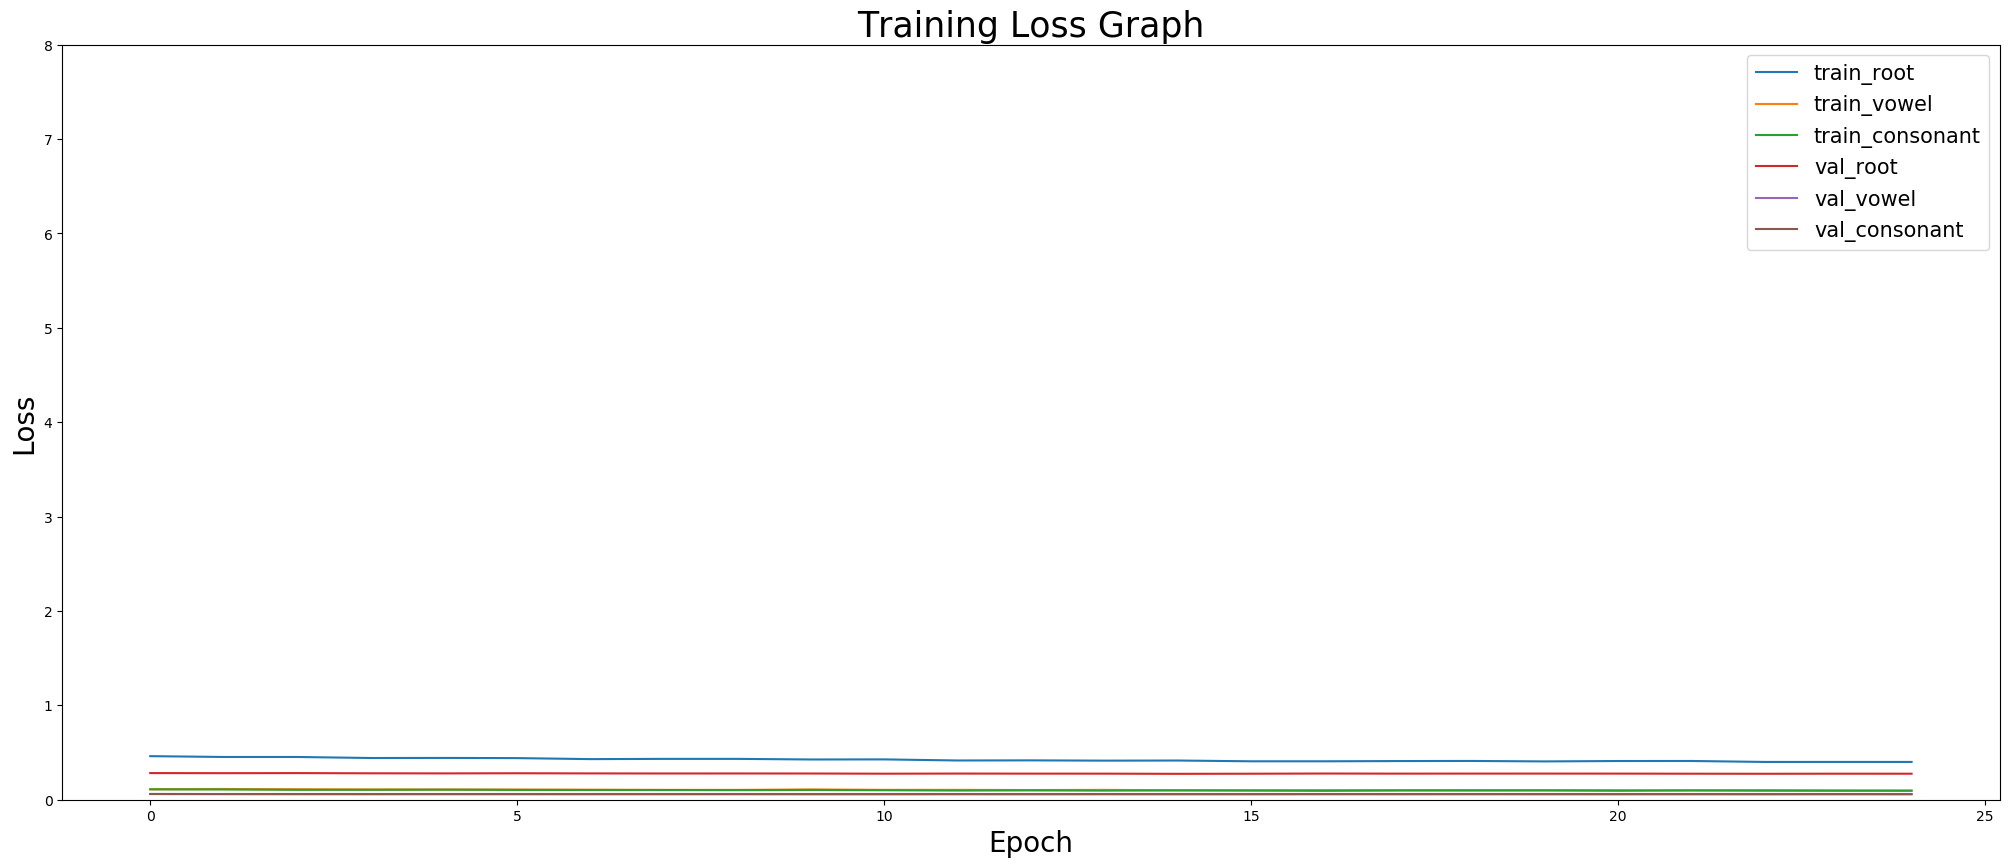

In [14]:
%matplotlib inline
for history in histories:
    plt.figure(figsize=(25, 10), dpi=100)

    plt.title('Training Loss Graph', fontsize=25)
    plt.xlabel('Epoch', fontsize=20)
    plt.ylabel('Loss', fontsize=20)
    plt.ylim(0, 8)
    
    plt.plot(np.arange(0.0, 25), history.history['activation_1_root_loss'], label='train_root')
    plt.plot(np.arange(0.0, 25), history.history['activation_2_vowel_loss'], label='train_vowel')
    plt.plot(np.arange(0.0, 25), history.history['final_activation_consonant_loss'], label='train_consonant')

    plt.plot(np.arange(0.0, 25), history.history['val_activation_1_root_loss'], label='val_root')
    plt.plot(np.arange(0.0, 25), history.history['val_activation_2_vowel_loss'], label='val_vowel')
    plt.plot(np.arange(0.0, 25), history.history['val_final_activation_consonant_loss'], label='val_consonant')

    plt.legend(loc='upper right', fontsize=15)
    plt.show()

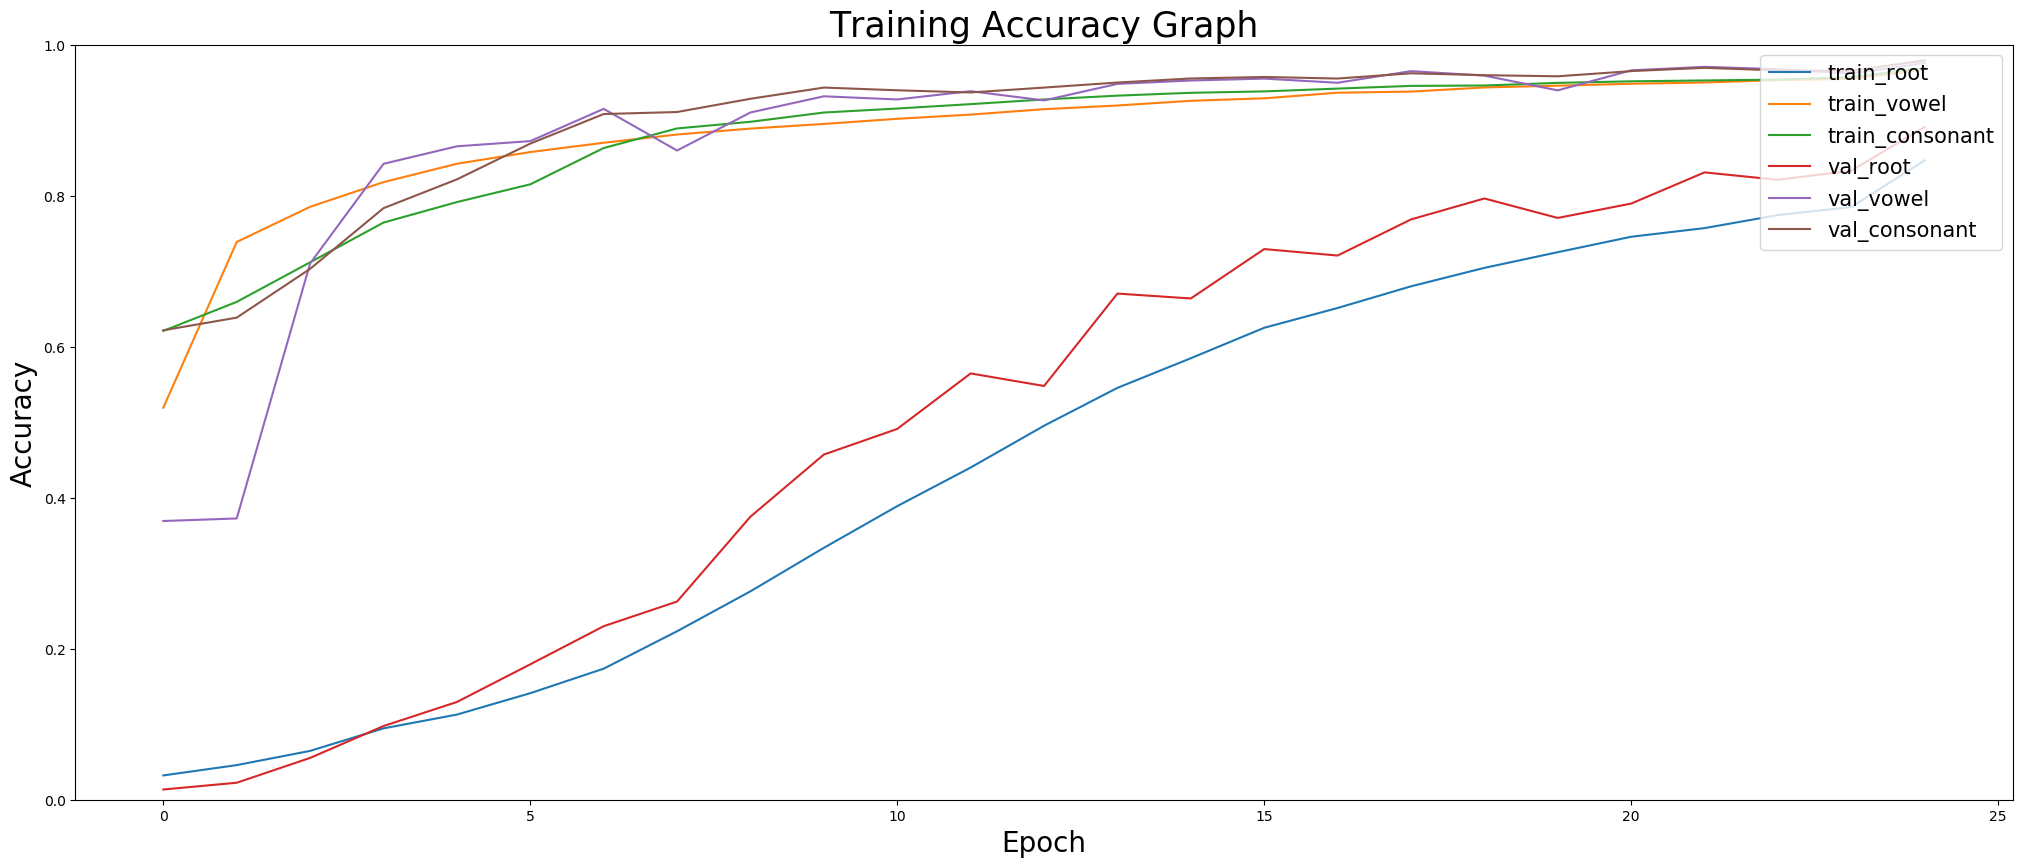

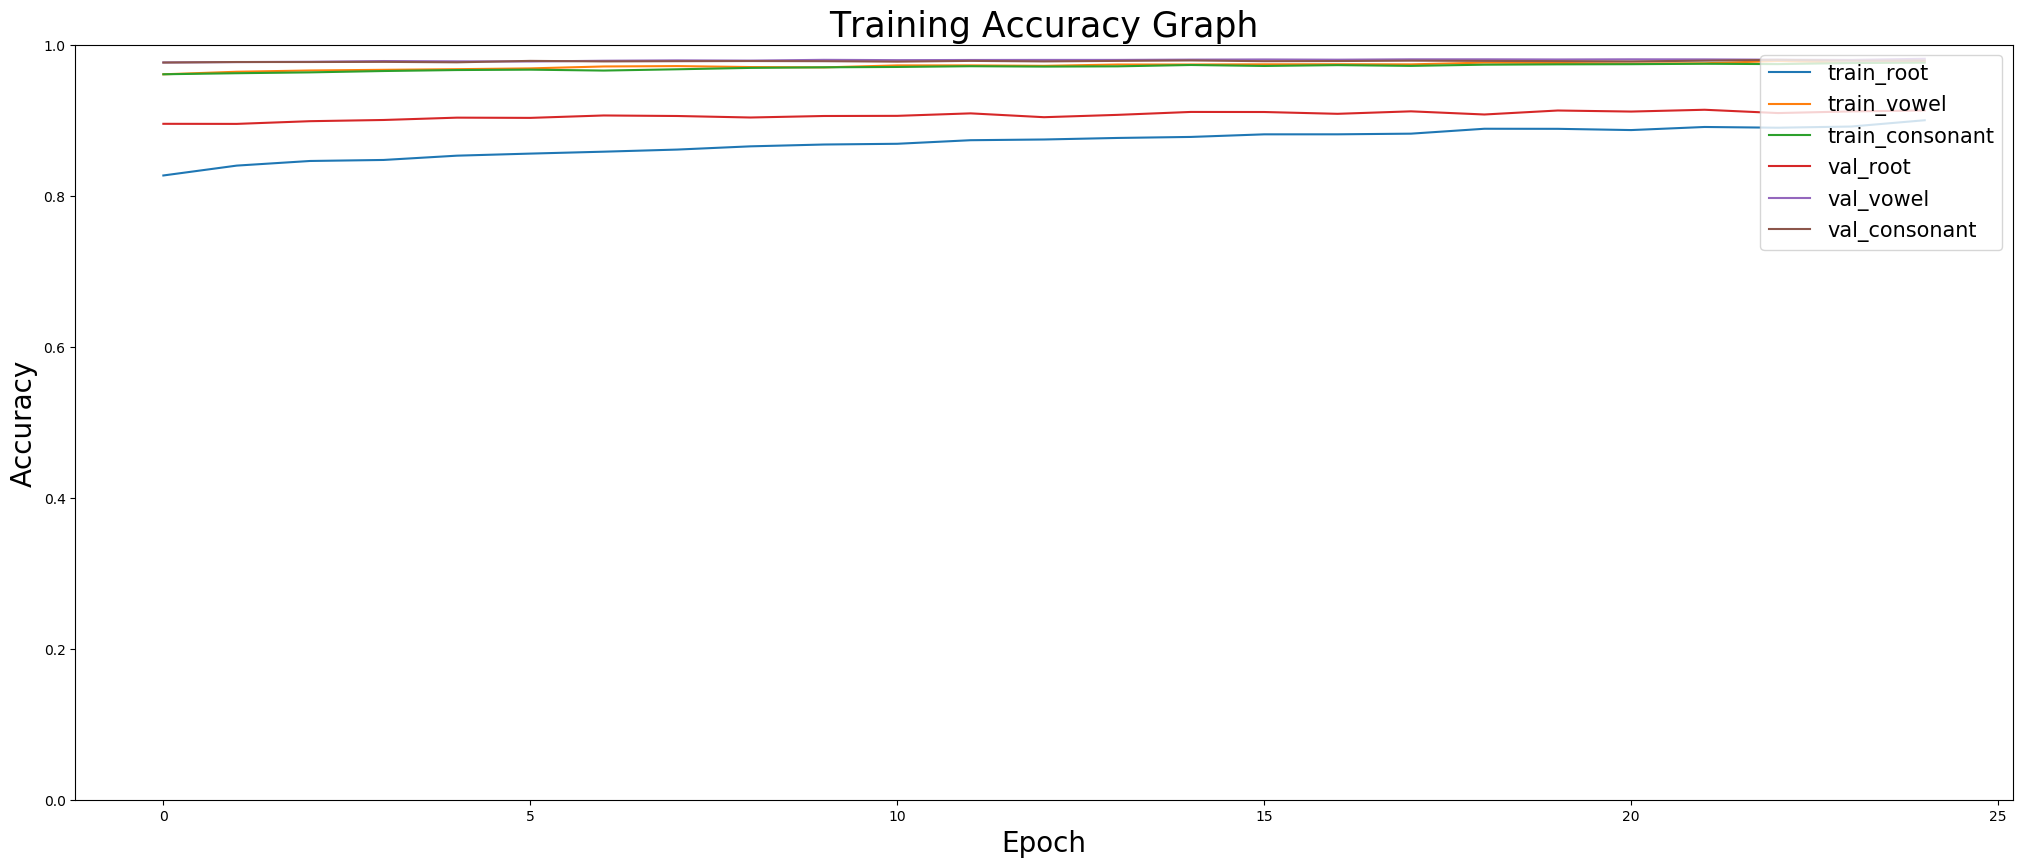

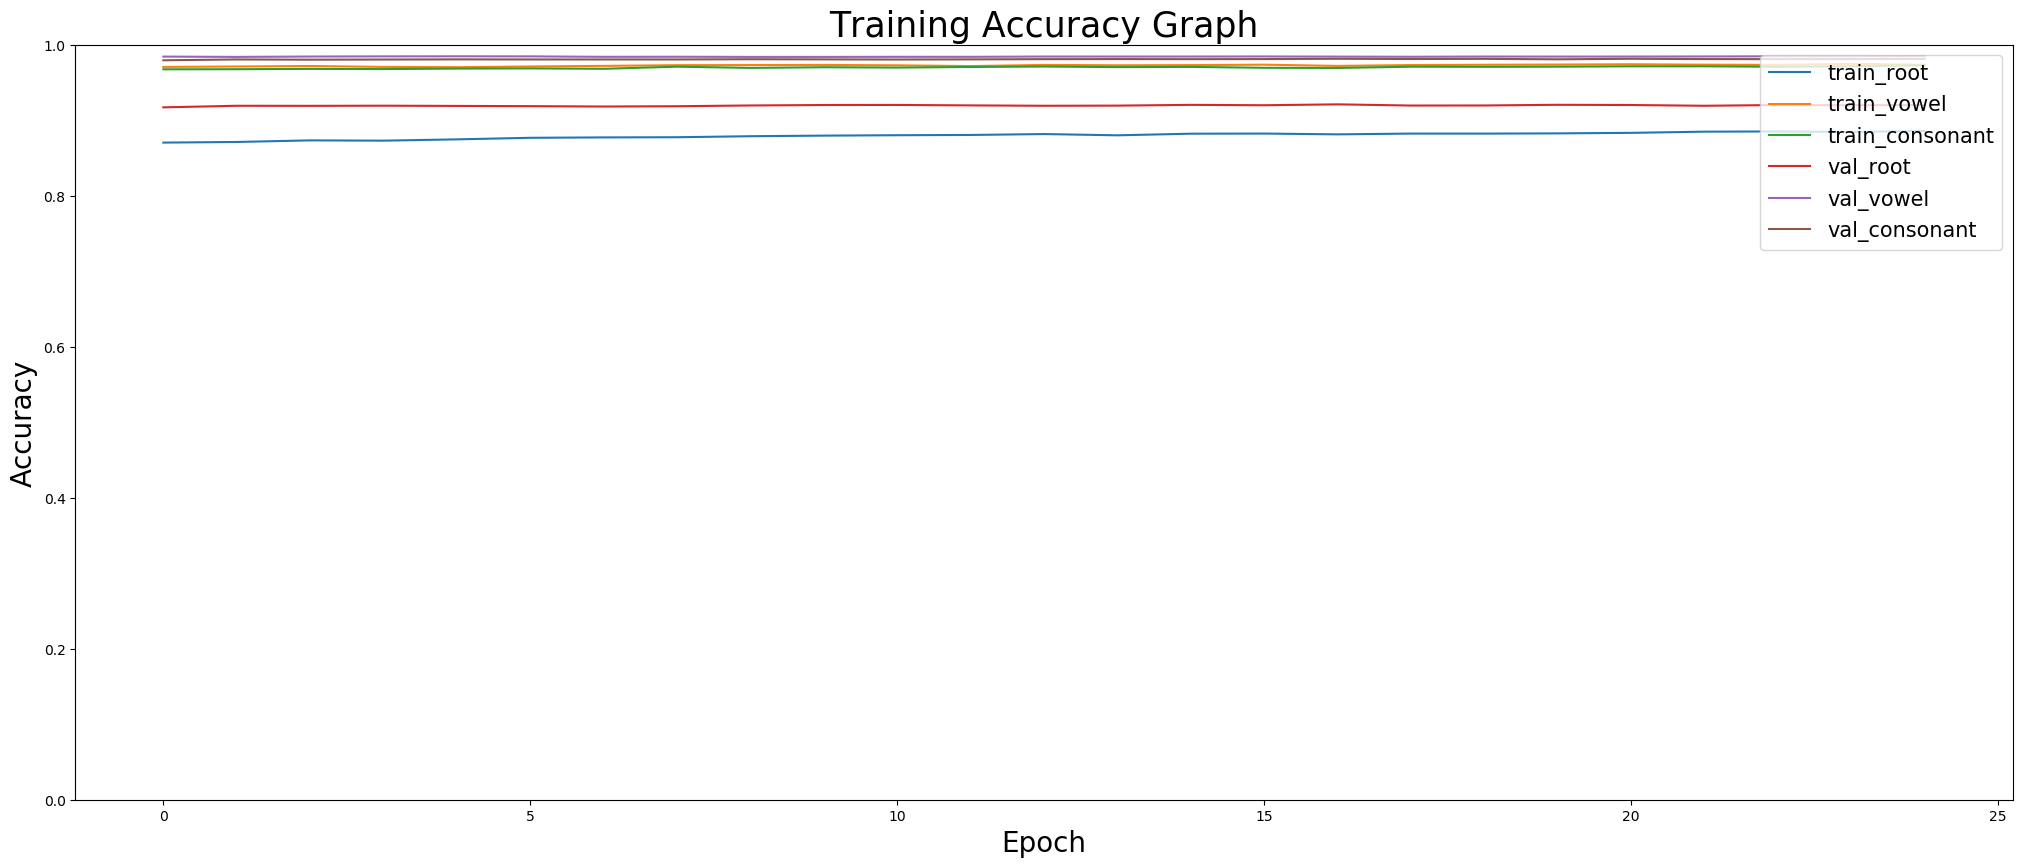

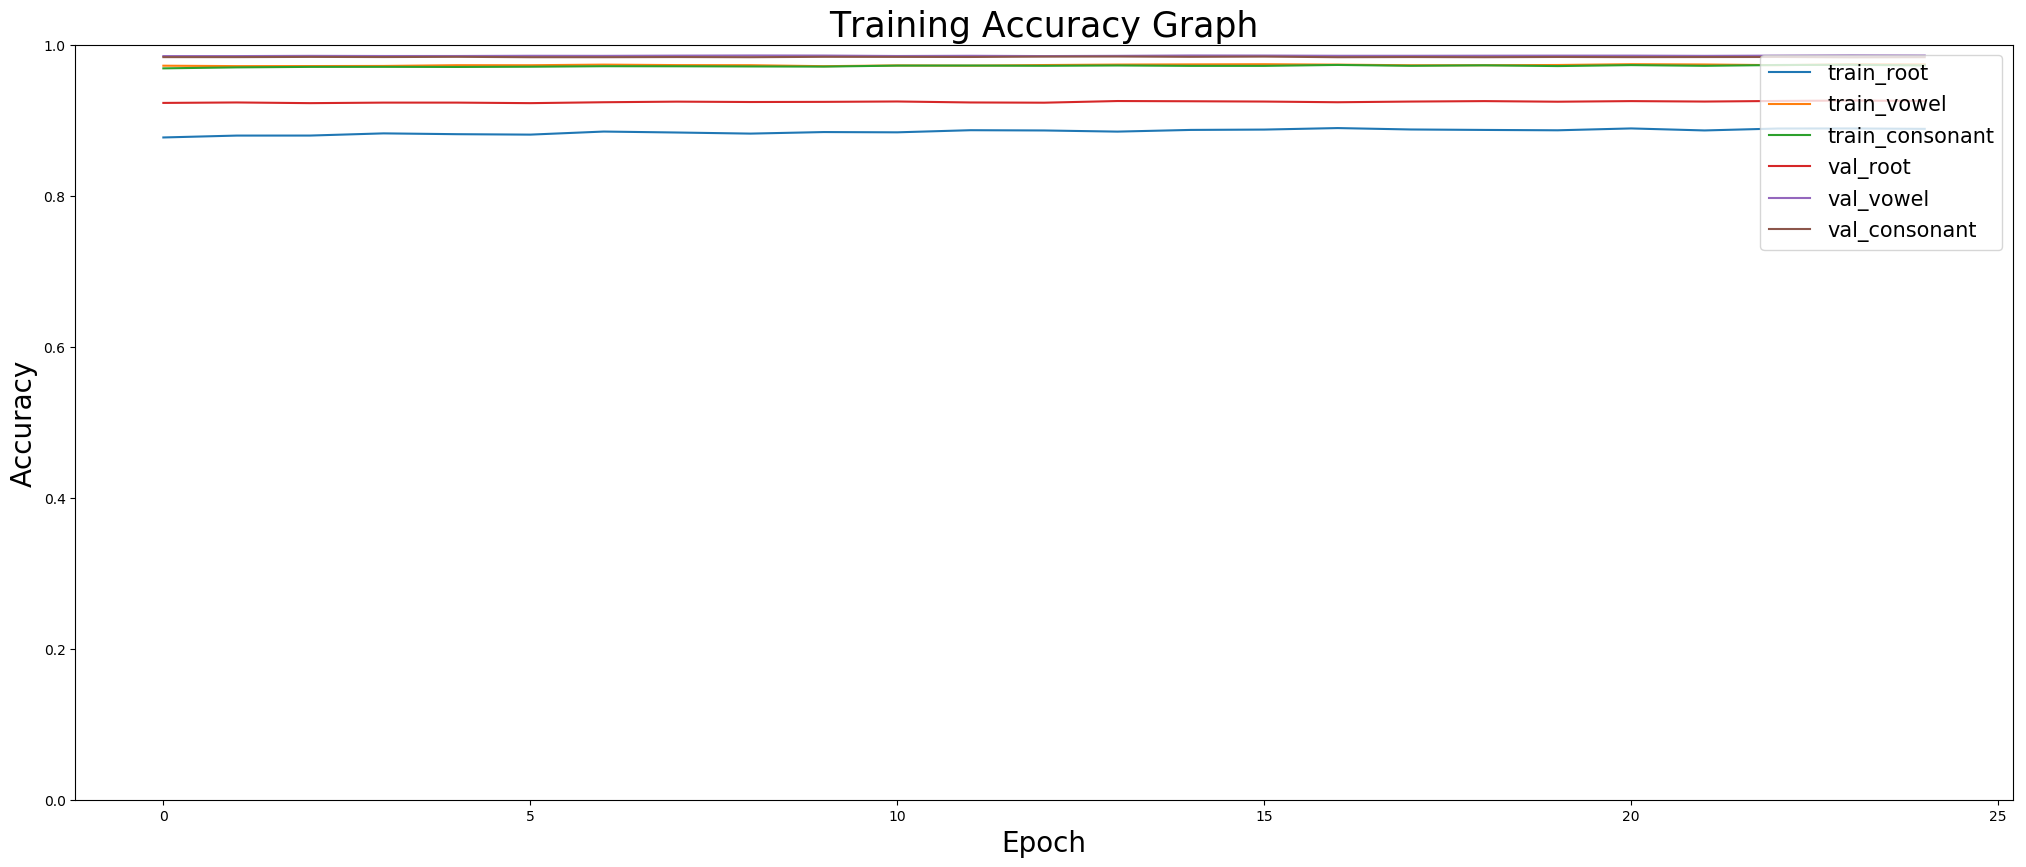

In [15]:
for history in histories:
    plt.figure(figsize=(25, 10), dpi=100)

    plt.title('Training Accuracy Graph', fontsize=25)
    plt.xlabel('Epoch', fontsize=20)
    plt.ylabel('Accuracy', fontsize=20)
    plt.ylim(0, 1)

    plt.plot(np.arange(0.0, 25), history.history['activation_1_root_accuracy'], label='train_root')
    plt.plot(np.arange(0.0, 25), history.history['activation_2_vowel_accuracy'], label='train_vowel')
    plt.plot(np.arange(0.0, 25), history.history['final_activation_consonant_accuracy'], label='train_consonant')

    plt.plot(np.arange(0.0, 25), history.history['val_activation_1_root_accuracy'], label='val_root')
    plt.plot(np.arange(0.0, 25), history.history['val_activation_2_vowel_accuracy'], label='val_vowel')
    plt.plot(np.arange(0.0, 25), history.history['val_final_activation_consonant_accuracy'], label='val_consonant')

    plt.legend(loc='upper right', fontsize=15)
    plt.show()